In [1]:
import pandas as pd
import numpy as np
# import scipy
import matplotlib.pyplot as plt
from pandas_datareader import data

In [2]:
# pnb = pd.read_csv("PNB.NS.csv",)
# idea = pd.read_csv("IDEA.NS.csv",)
# nifty = pd.read_csv("nifty.csv",)

In [3]:
# pnb

In [4]:
# data = pd.DataFrame()
# data['Date'] = pnb['Date']
# data['PnB'] = pnb['Adj Close']
# data['Idea'] = idea['Adj Close']
# data['Nifty'] = nifty['Adj Close']    #created the df to be used
# data

In [5]:
# weights = [0.1, 0.2, 0.3]

In [6]:
# cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()

# ind_er = data.resample('Y').last().pct_change().mean()
# ind_er

In [7]:
df = data.DataReader(['^NSEI', 'PNB.NS', 'IDEA.NS'], 'yahoo', start='2020/01/01', end='2021/01/01')
df = df['Adj Close']
df

Symbols,^NSEI,PNB.NS,IDEA.NS
Date,,,
2020-01-01,12182.500000,64.699997,6.10
2020-01-02,12282.200195,66.699997,6.10
2020-01-03,12226.650391,65.050003,6.10
2020-01-06,11993.049805,61.400002,6.00
2020-01-07,12052.950195,61.849998,6.00
...,...,...,...
2020-12-28,13873.200195,32.400002,10.40
2020-12-29,13932.599609,33.200001,10.30
2020-12-30,13981.950195,32.750000,10.20


In [8]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,^NSEI,PNB.NS,IDEA.NS
Symbols,,,
^NSEI,0.000402,0.000296,0.000366
PNB.NS,0.000296,0.000943,0.000454
IDEA.NS,0.000366,0.000454,0.005620


In [9]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,^NSEI,PNB.NS,IDEA.NS
Symbols,,,
^NSEI,1.000000,0.481732,0.243714
PNB.NS,0.481732,1.000000,0.197164
IDEA.NS,0.243714,0.197164,1.000000


In [10]:
ind_er = df.resample('Y').last().pct_change().mean()
w = [0.1, 0.2, 0.5]
port_er = (w*ind_er).sum()
port_er

0.036411621496774835

In [11]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
^NSEI      0.316913
PNB.NS     0.485472
IDEA.NS    1.185291
dtype: float64

In [12]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 1000

In [13]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [14]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
data

{'Returns': [0.029136092757246507,
  0.04713670000873063,
  0.02025250077643069,
  0.02813044783866044,
  0.04160896396010632,
  0.036955491020698346,
  0.05205678542099013,
  0.04488106083229586,
  0.03236654475608091,
  0.02052391216602982,
  0.036907865203526936,
  0.011867612766790662,
  0.03956594904250689,
  0.03332082058406117,
  0.03553283593763174,
  0.024803245381757544,
  0.0342661025644006,
  0.00947249141857638,
  0.026311723202729953,
  0.031151635322569808,
  0.027572936789750684,
  0.04024786598771893,
  0.023650501427170567,
  0.03368018362187808,
  0.038904371102759225,
  0.03713343865087078,
  0.04789804990953982,
  0.018852866690808764,
  0.017806877904491734,
  0.03197099577876439,
  0.03266504753913764,
  0.031511735023438715,
  0.03601693892697423,
  0.019931331489180144,
  0.03447567496960142,
  0.023802281851961808,
  0.042138443280738326,
  0.03526580946316054,
  0.020184830068759443,
  0.04879375630449055,
  0.05128855694143975,
  0.024817410372905906,
  0.04

In [15]:
portfolios  = pd.DataFrame(data)
portfolios

,Returns,Volatility,^NSEI weight,PNB.NS weight,IDEA.NS weight
0,0.029136,0.619629,0.438167,0.092778,0.469055
1,0.047137,1.008748,0.089102,0.072696,0.838202
2,0.020253,0.327275,0.617188,0.369493,0.013319
3,0.028130,0.353209,0.466993,0.462365,0.070642
4,0.041609,0.722459,0.200264,0.235682,0.564054
...,...,...,...,...,...
995,0.024236,0.351250,0.539507,0.348011,0.112482
996,0.044305,0.738740,0.149012,0.273701,0.577288
997,0.036862,0.659297,0.291396,0.204382,0.504222
998,0.032570,0.509166,0.376417,0.280529,0.343054


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

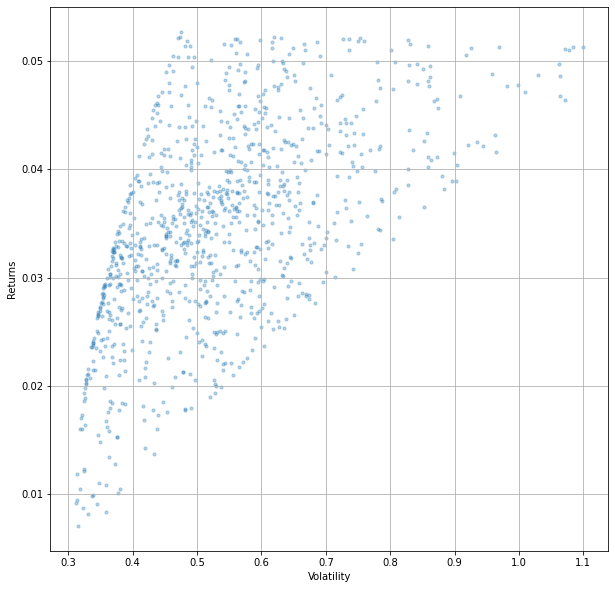

In [16]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])